**Данные**

Имеются пробы нефти в 3 регионах: в каждом 10000 месторождений, для которых измерили качество нефти и объем запасов.

**Цель проекта**

Нужно проанализировать возможную прибыль и риски и решить в каком регионе лучше всего вести добычу нефти.

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

sns.set()

Загрузим данные, которые представляют собой пробы нефти в трех разных регионах

In [2]:
data_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/The Most Profitable Oil Well Location Selection/geo_data_0.csv")

In [3]:
data_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/The Most Profitable Oil Well Location Selection/geo_data_1.csv")

In [4]:
data_3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/The Most Profitable Oil Well Location Selection/geo_data_2.csv")

**Описание данных**

***id*** — уникальный идентификатор скважины;

***f0, f1, f2*** — три признака точек (неважно, что они означают, но сами признаки значимы);

***product*** — объём запасов в скважине (тыс. баррелей).

Взглянем на данные всех трех регионов и на их статистические характеристики

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
data_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Предобработка и исследовательский анализ данных**

Проверим, есть ли корреляция между столбцами путем построения диаграмм рассеивания и тепловых карт

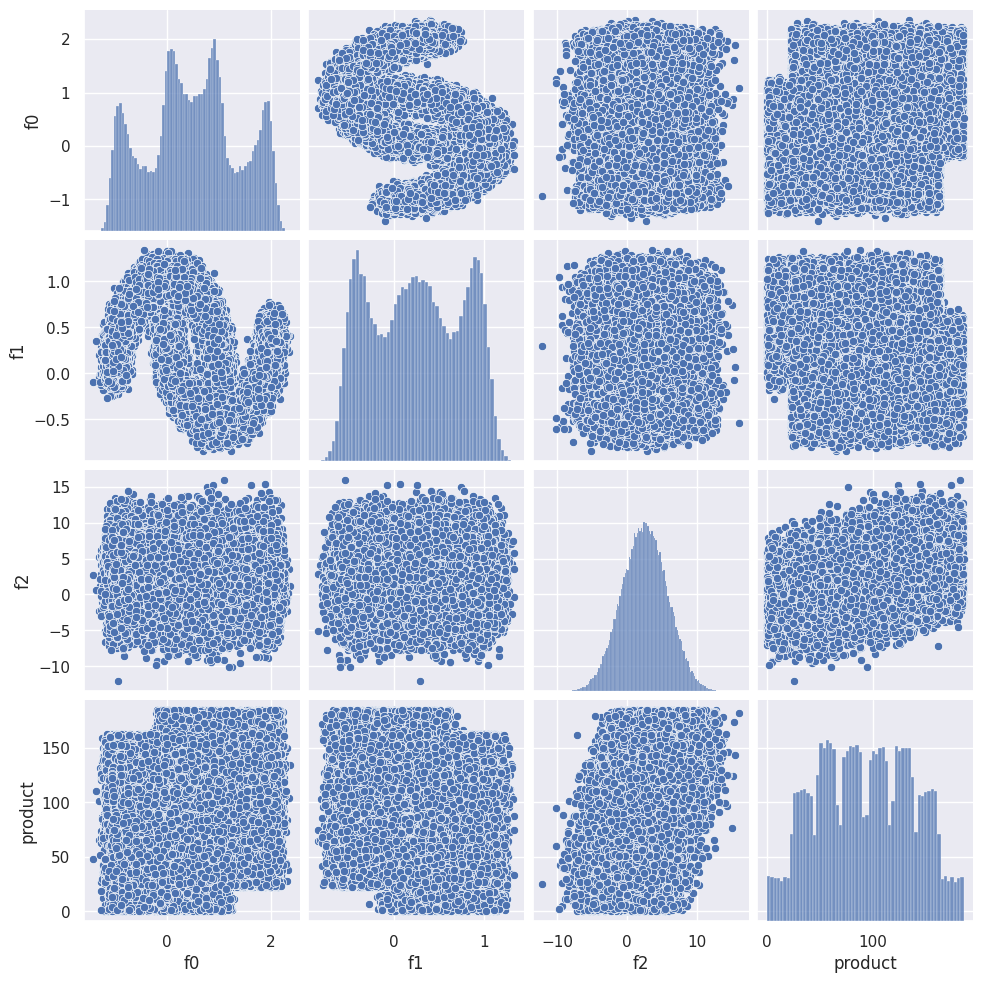

In [14]:
sns.pairplot(data_1)

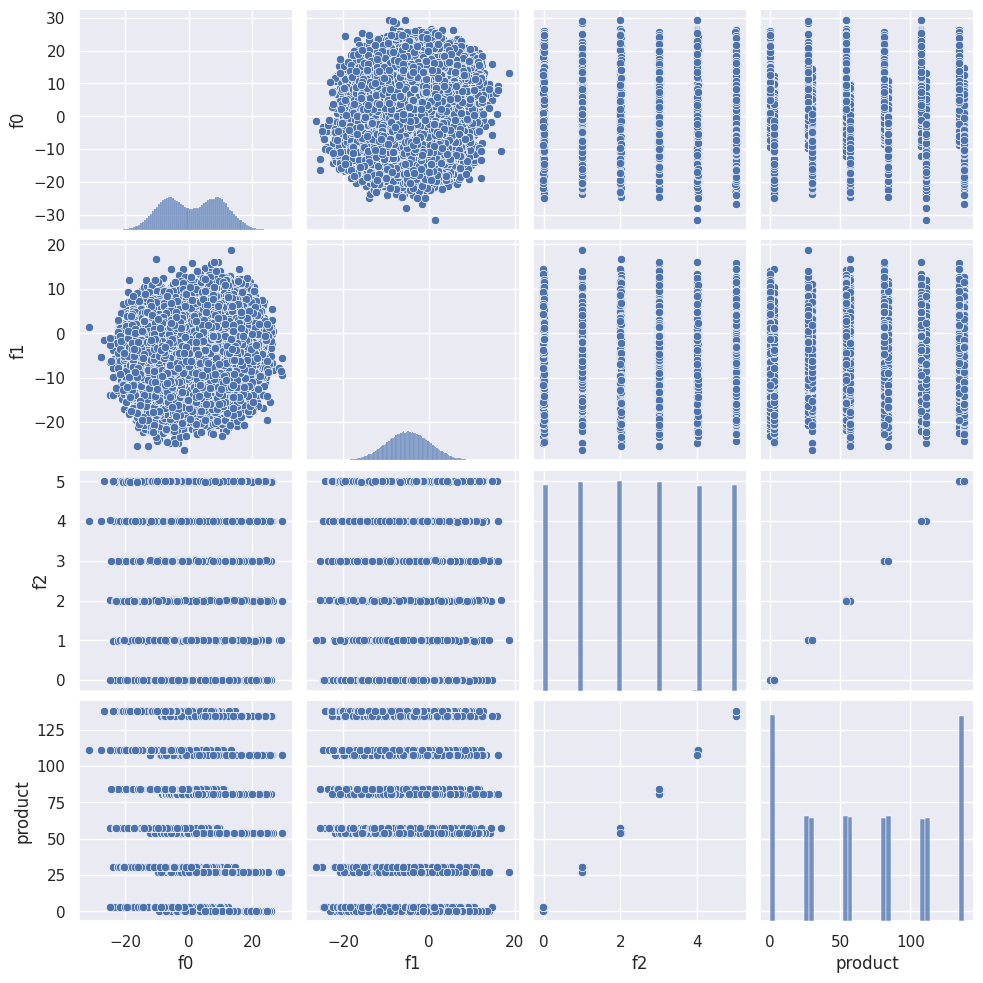

In [15]:
sns.pairplot(data_2)

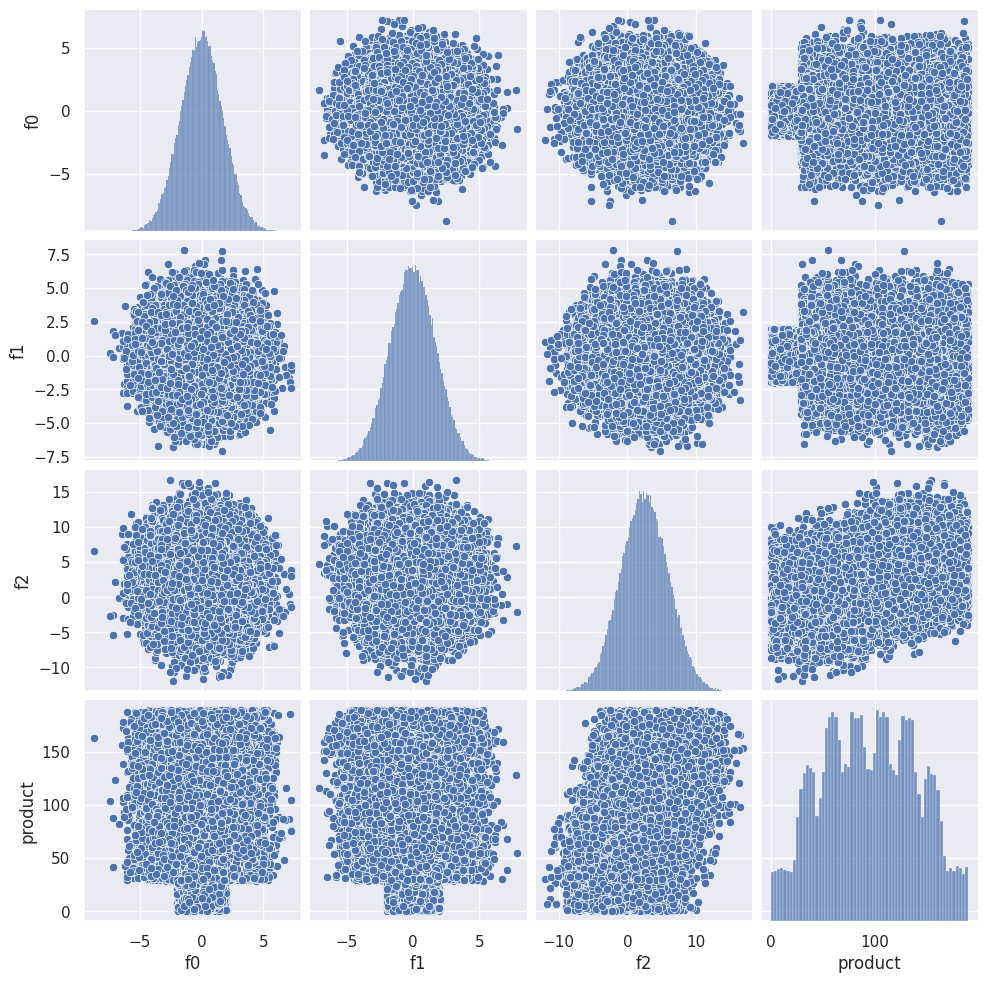

In [16]:
sns.pairplot(data_3)

<ipython-input-17-3f39d94d2746>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_1.corr(), annot=True)


<Axes: >

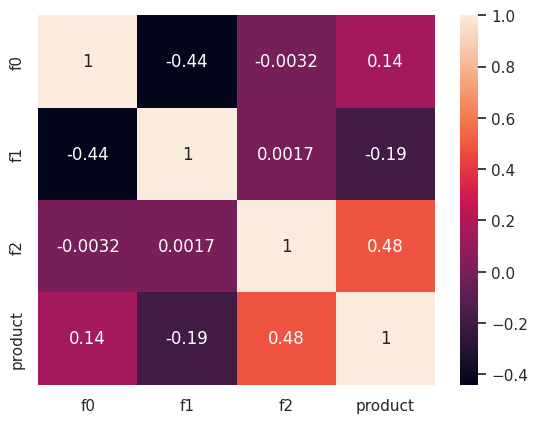

In [17]:
sns.heatmap(data_1.corr(), annot=True)

<ipython-input-18-4ce733063b83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2.corr(), annot=True)


<Axes: >

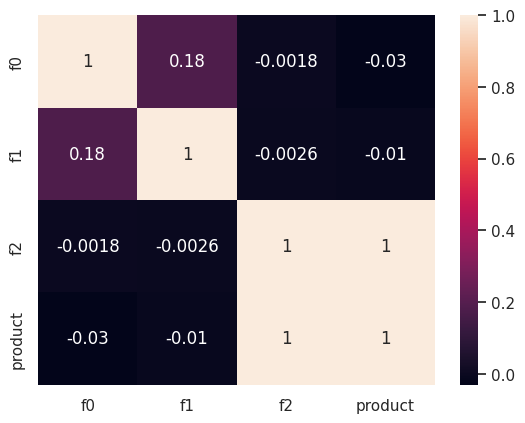

In [18]:
sns.heatmap(data_2.corr(), annot=True)

<ipython-input-19-acd4aca86505>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_3.corr(), annot=True)


<Axes: >

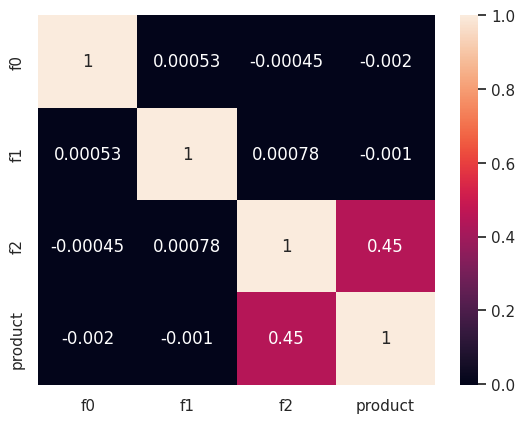

In [19]:
sns.heatmap(data_3.corr(), annot=True)

Примечательно, что во втором регионе корреляция между столбцами ***f2*** и ***product*** - максимальная

В остальных регионах корреляция между этими столбцами слабая.

Между остальными столбцами во всех регионах корреляция отсутствует

Проверим датасеты на дубликаты и пропуски.



In [20]:
data = [data_1, data_2, data_3]

In [21]:
for i in range(len(data)):
  print(i+1, 'region:', data[i].duplicated().sum())

1 region: 0
2 region: 0
3 region: 0


In [22]:
for i in range(len(data)):
  print(i+1, ' region:\n', data[i].isna().sum(), sep='', end='\n\n')

1 region:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

2 region:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

3 region:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64



Дубликаты и пропуски в данных отсутствуют

столбец ***id*** для обучения модели нам не нужен, удалим его

In [23]:
for i in range(len(data)):
  data[i] = data[i].drop(columns=['id'], axis=1)

Посмотрим на распределения столбцов

***f0***

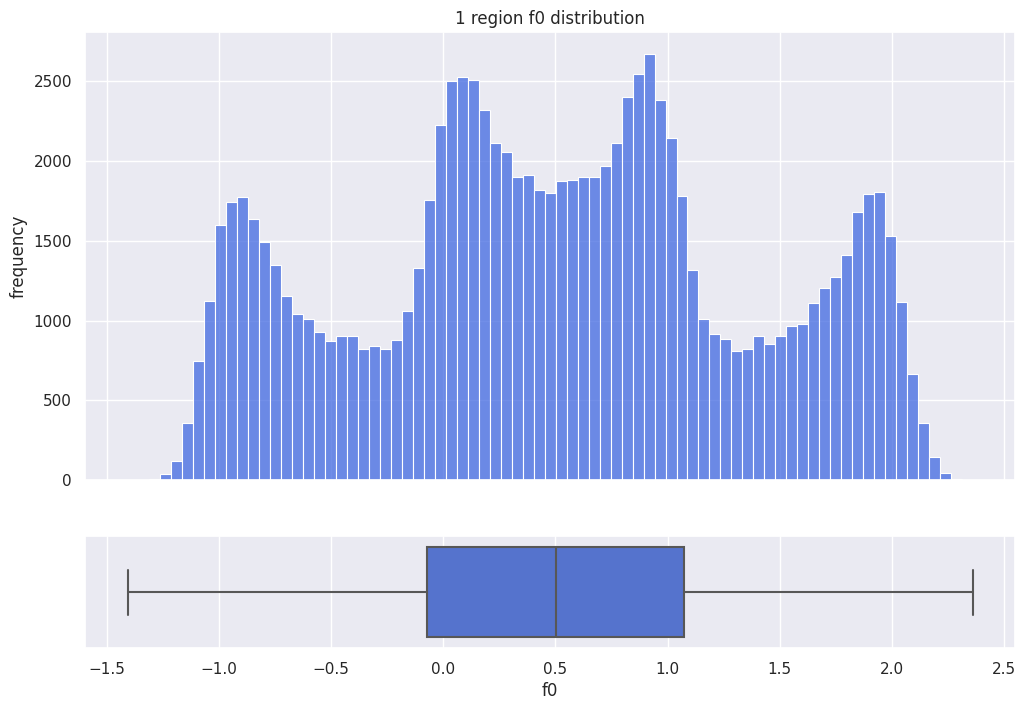

In [24]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_1['f0'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_1['f0'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f0')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='1 region f0 distribution')
plt.show()

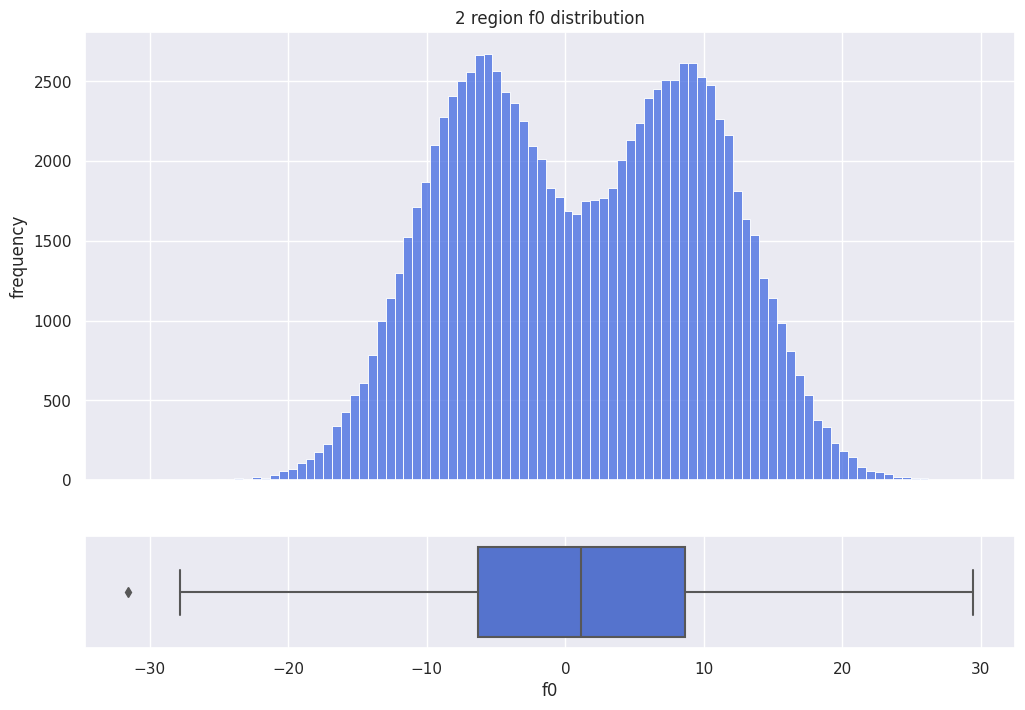

In [25]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_2['f0'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_2['f0'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f0')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='2 region f0 distribution')
plt.show()

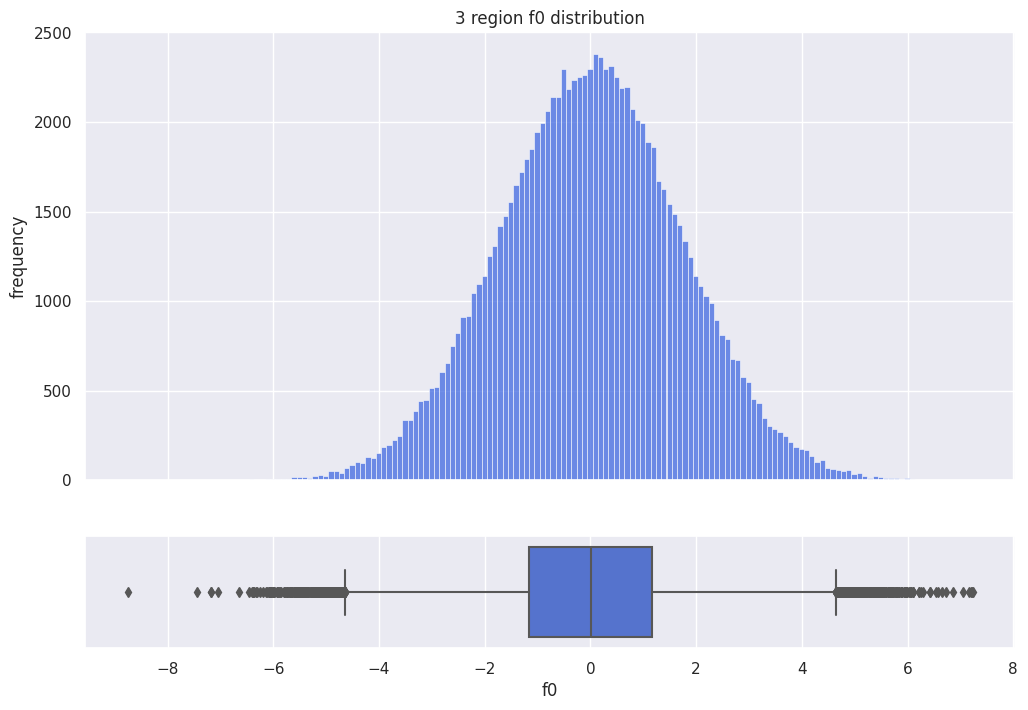

In [26]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_3['f0'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_3['f0'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f0')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='3 region f0 distribution')
plt.show()

Столбец f0 принадлежит нормальному распределению

***f1***

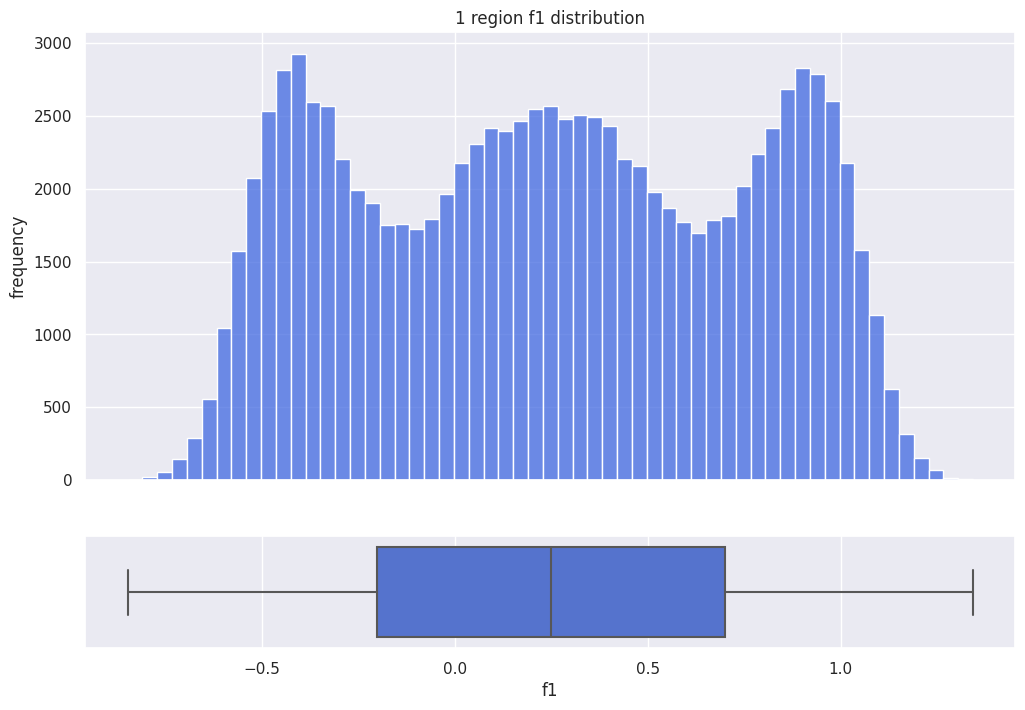

In [27]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_1['f1'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_1['f1'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f1')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='1 region f1 distribution')
plt.show()

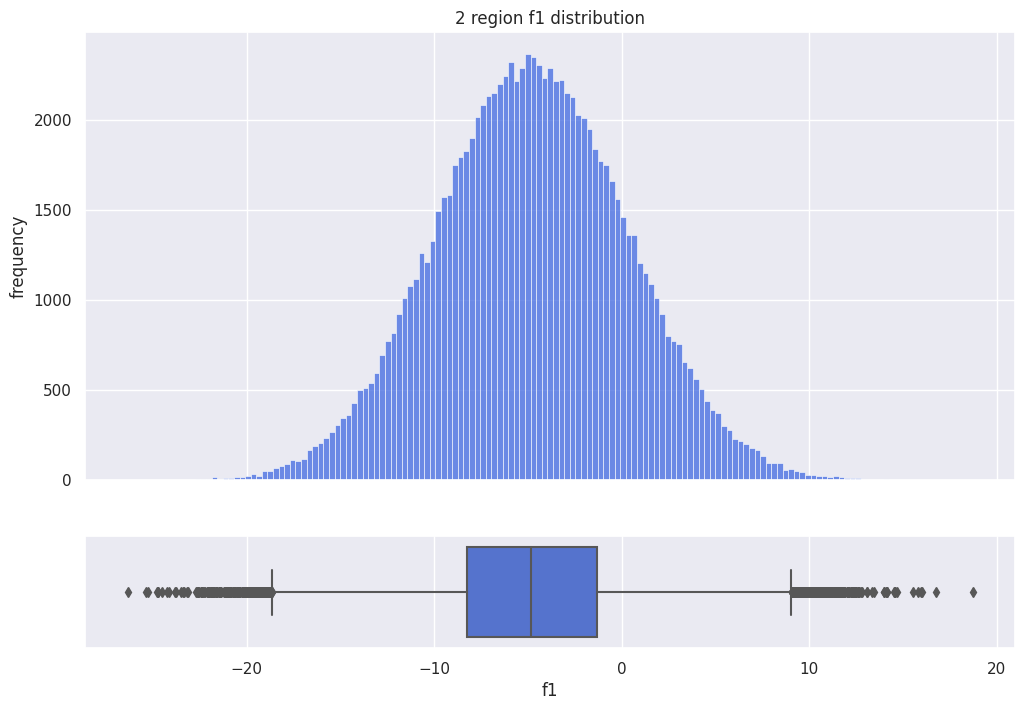

In [28]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_2['f1'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_2['f1'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f1')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='2 region f1 distribution')
plt.show()

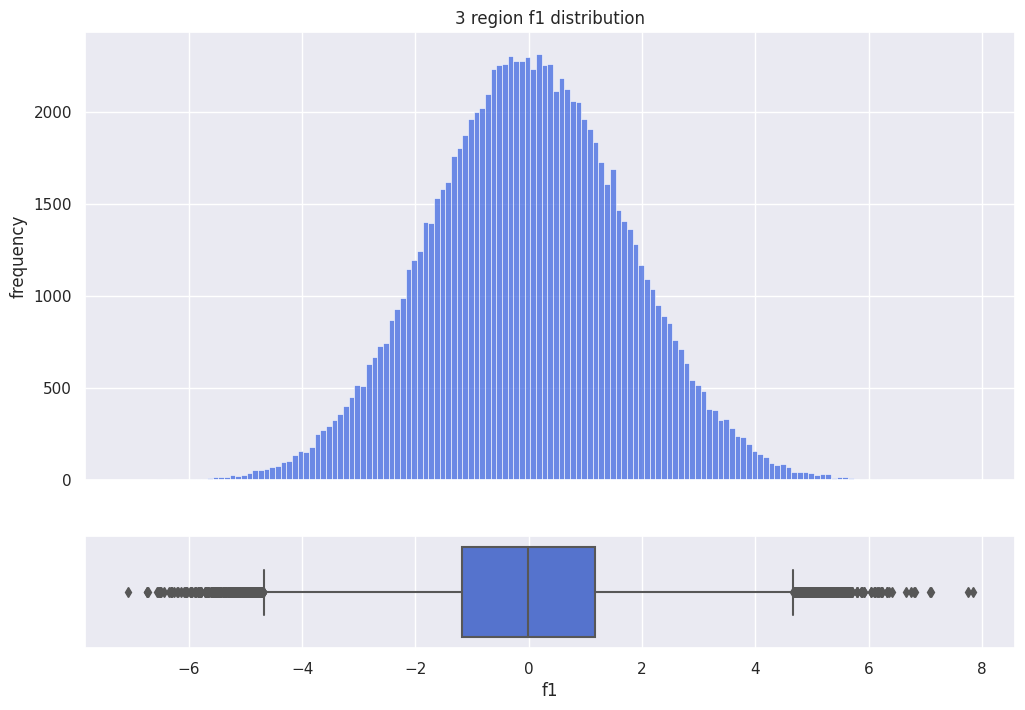

In [29]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_3['f1'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_3['f1'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f1')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='3 region f1 distribution')
plt.show()

В столбце f1 также  нормальное распределение

***f2***

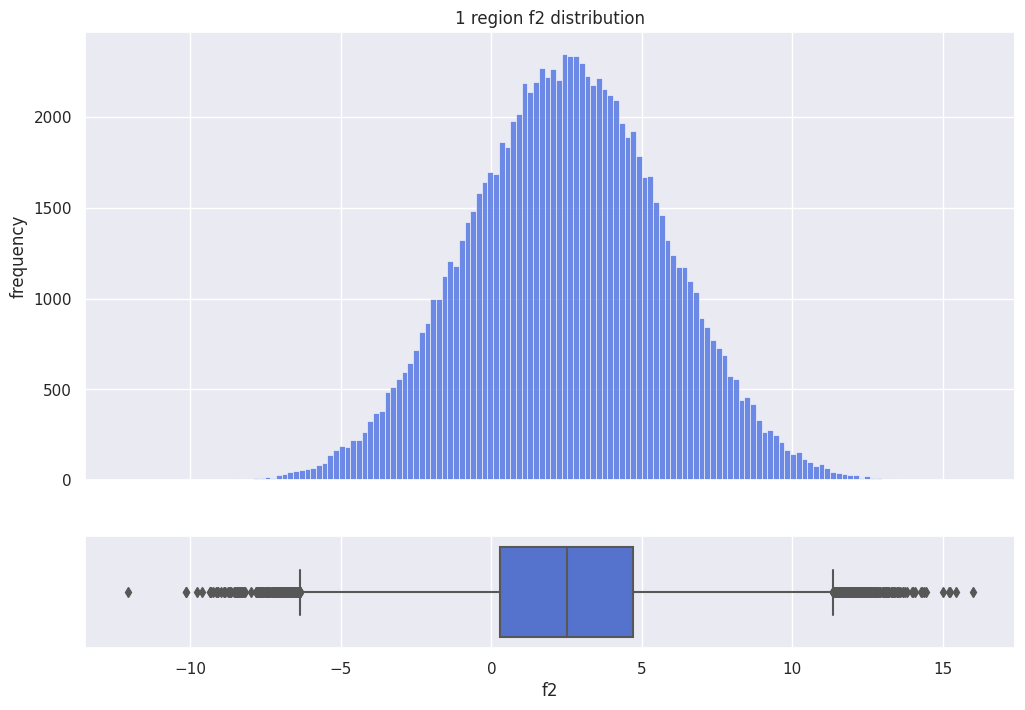

In [30]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_1['f2'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_1['f2'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f2')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='1 region f2 distribution')
plt.show()

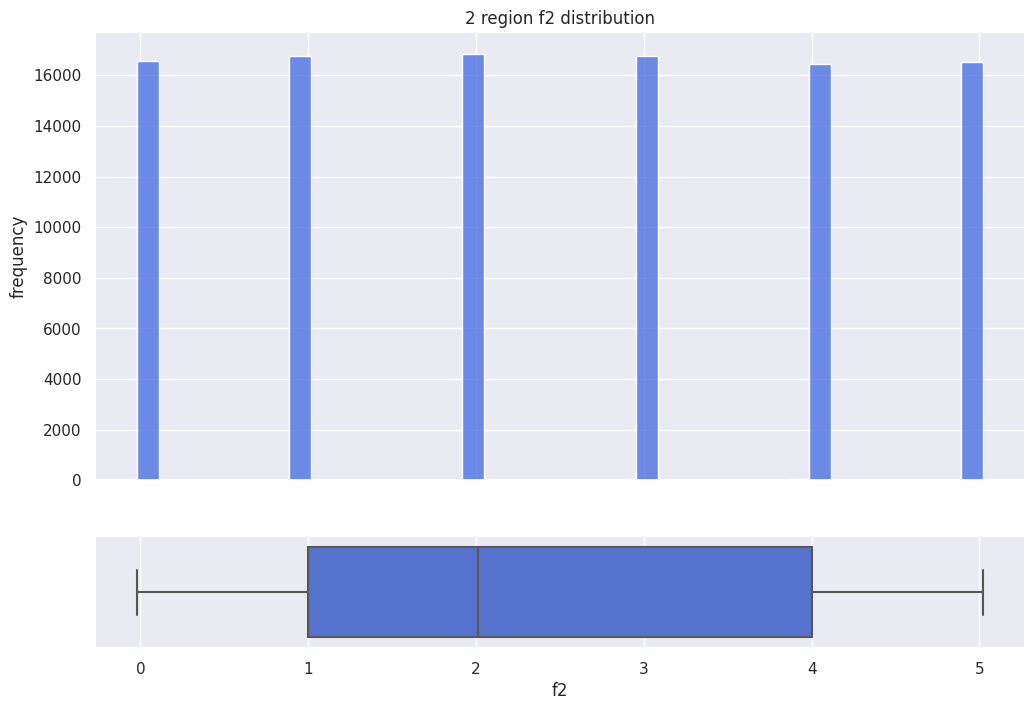

In [31]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_2['f2'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_2['f2'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f2')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='2 region f2 distribution')
plt.show()

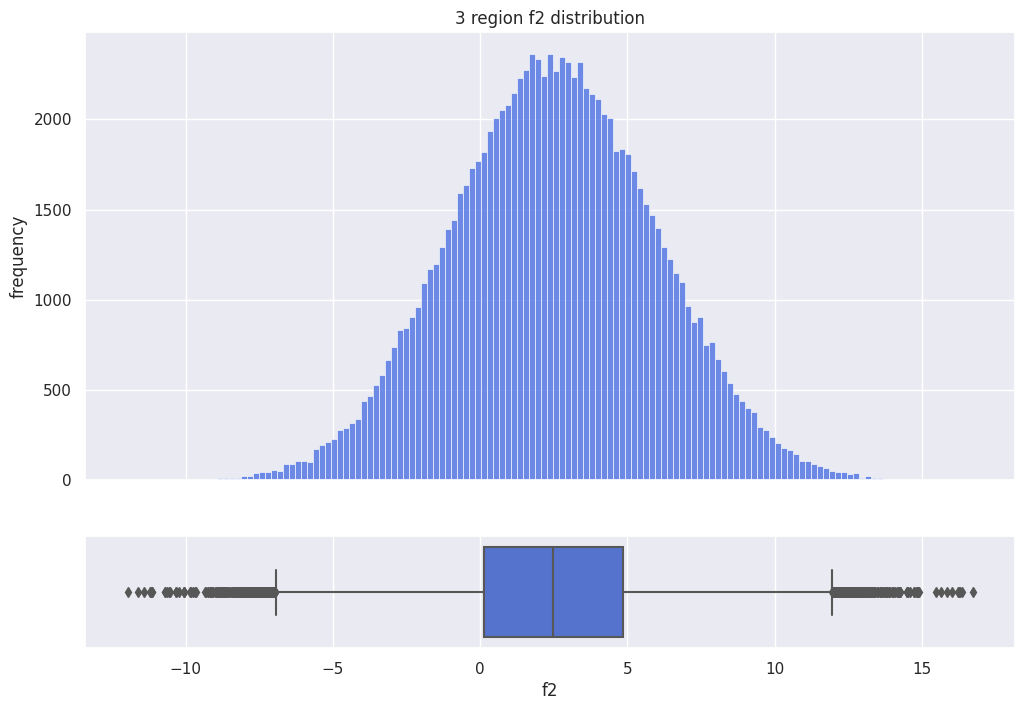

In [32]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_3['f2'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_3['f2'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='f2')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='3 region f2 distribution')
plt.show()

Для первого и третьего региона столбец f2 имеет нормальное распределение, а для второго региона распределение близко к равномерному

***product***

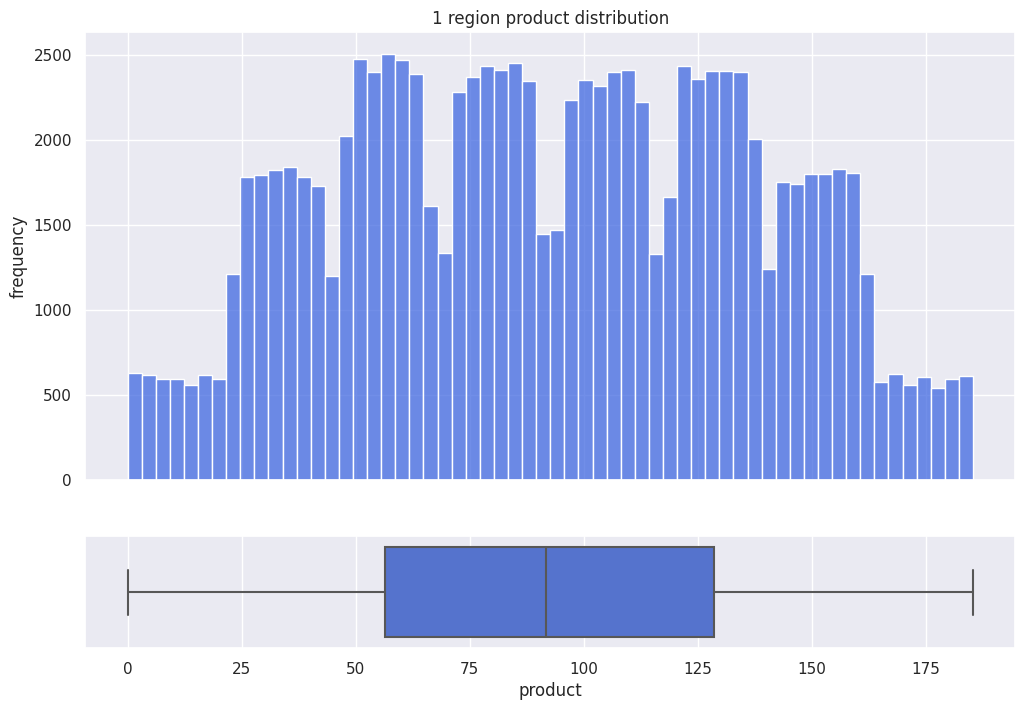

In [33]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_1['product'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_1['product'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='product')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='1 region product distribution')
plt.show()

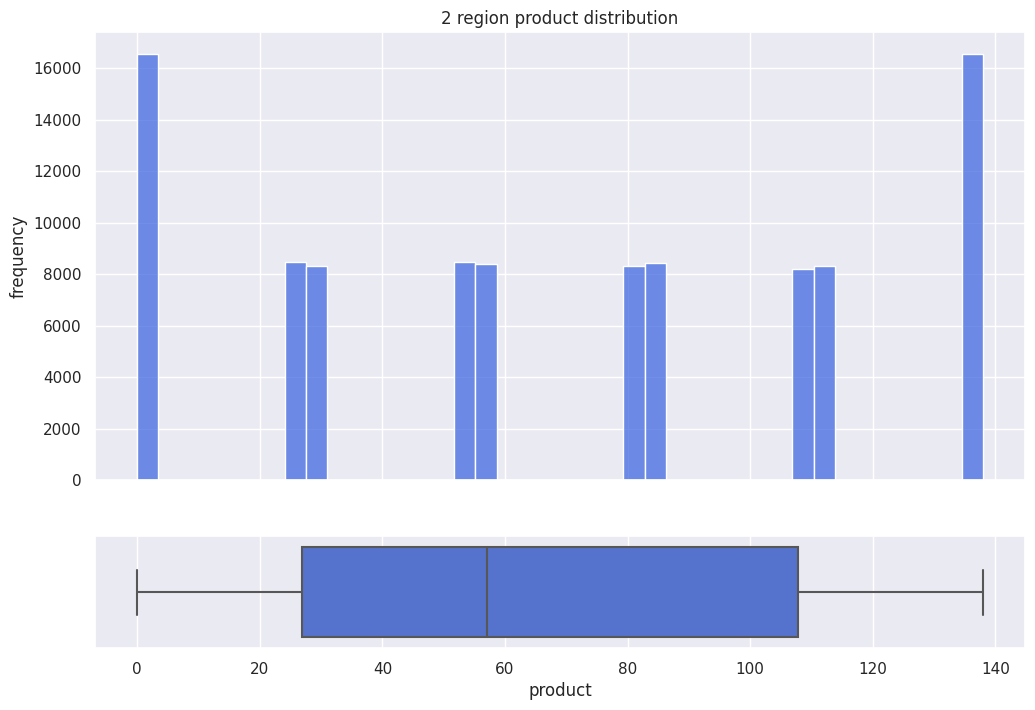

In [34]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_2['product'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_2['product'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='product')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='2 region product distribution')
plt.show()

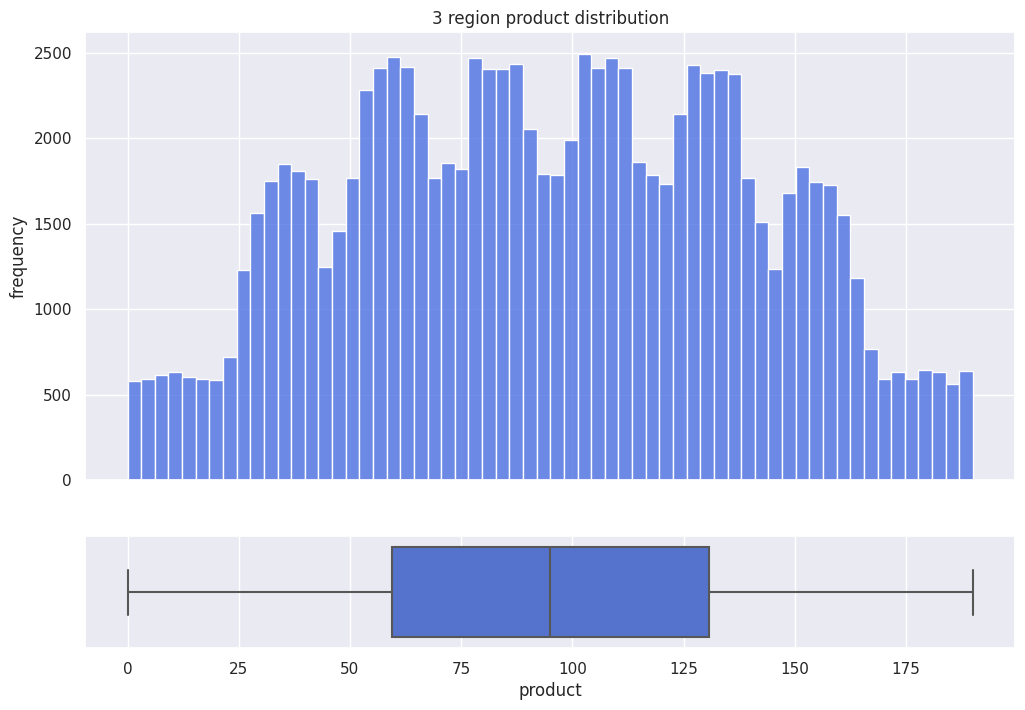

In [35]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_3['product'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_3['product'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='product')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='3 region product distribution')
plt.show()

В первом и третьем регионе распределение нормальное, а во втором регионе распределение данных не принадлежит ни к какому из типов распределений

**Обучение модели линейной регрессии**

Приступим к обучению модели

Таргетом является ***product***

In [36]:
x = []
y = []

for i in range(len(data)):
  x.append(data[i].drop(columns=['product'], axis=1))
  y.append(data[i]['product'])

Разобьем датасеты на обучающую и валидационную выборки в соотношении 3:1

In [37]:
x_train = [0, 0, 0]
x_valid = [0, 0, 0]
y_train = [0, 0, 0]
y_valid = [0, 0, 0]

for i in range(len(data)):
  x_train[i], x_valid[i], y_train[i], y_valid[i] = train_test_split(x[i], y[i], test_size=0.25, random_state=987)

In [38]:
for i in range(len(data)):
  print(x_train[i].shape, x_valid[i].shape, y_train[i].shape, y_valid[i].shape)

(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)


Обучим три модели и найдем корень средней квадратичной ошибки для каждой

In [39]:
model = [LinearRegression(), LinearRegression(), LinearRegression()]
pred = []

for i in range(len(data)):
  model[i].fit(x_train[i], y_train[i])
  pred.append(model[i].predict(x_valid[i]))
  print(i+1, "region:")
  print("mean:", pred[i].mean())
  print("rmse:", mean_squared_error(y_valid[i], pred[i])**0.5)
  print()

1 region:
mean: 92.28927701754937
rmse: 37.792831552593164

2 region:
mean: 68.5171329328823
rmse: 0.8917216848996902

3 region:
mean: 94.82934916183217
rmse: 39.84264286911154



Для каждого региона построена модель линейной регрессии. Для 2 региона ошибка минимальна вследствие того, что ***f2*** и ***product*** очень сильно коррелируют, при этом средний объем сырья для всех предсказаний составляет 68 тыс. баррелей. Для остальных регионов ошибка предсказания составила примерно 37-39 тыс. баррелей при среднем предсказанного объема сырья в 92-94 тыс. баррелей

**Подготовка к расчету прибыли**

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [40]:
budget = 10000000000
barrel_price = 450000

BOOTSTRAP = 1000
SAMPLE_SIZE = 500

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [41]:
sufficient_volume = budget / barrel_price / 200
sufficient_volume

111.11111111111111

In [42]:
for i in range(len(data)):
  print(i+1, "region:", data[i]['product'].mean())

1 region: 92.50000000000001
2 region: 68.82500000000002
3 region: 95.00000000000004


Для безубыточной разработки новой скважины достаточный объем сырья, полученный из нее, должен быть не менее 111 тыс. баррелей. Средний объем сырья из одной скважины составляет 92, 68 и 95 тыс. баррелей для трех регионов, что меньше, чем необходимо.

**Расчет прибыли и рисков**

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели

In [43]:
def revenue(target, probabilities, count):
  probs_sorted = pd.Series(probabilities).sort_values(ascending=False)
  selected = target[probs_sorted.index][:count]
  return selected.sum() * 450000

In [44]:
prob = []
for i in range(len(data)):
  prob.append(model[i].predict(x[i]))

Рассчитаем прибыль от 200 скважин с наивысшим показателем объема сырья среди случайной выборки размером 500 скважин для всех регионов


In [45]:
y_subsample = []
prob_subsample = []

for i in range(len(data)):
  y_subsample.append(y[i].sample(n=500, replace=True, random_state=987))
  prob_subsample.append(pd.Series(prob[i])[y_subsample[i].index])
  print(i+1, "region:", revenue(y_subsample[i], prob_subsample[i], 200) - budget)

1 region: 826653487.4839592
2 region: 379286157.6916027
3 region: 600555469.2528629


Полученные показатели прибыли показывают, что разработка новых скважин в каждом из регионов окажется прибыльной

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

In [46]:
state = np.random.RandomState(987)

values = [[], [], []]

for i in range(BOOTSTRAP):
  y_subsample = []
  prob_subsample = []
  for j in range(len(data)):
    y_subsample.append(y[j].sample(n=SAMPLE_SIZE, replace=True, random_state=state))
    prob_subsample.append(pd.Series(prob[j])[y_subsample[j].index])

    values[j].append(revenue(y_subsample[j], prob_subsample[j], 200) - budget)

In [47]:
mean = []
lower = []
upper = []

for i in range(len(data)):
  values[i] = pd.Series(values[i])
  mean.append(values[i].mean())
  lower.append(values[i].quantile(0.025))
  upper.append(values[i].quantile(0.975))
  print(i+1, "mean:\t", mean[i], "\n2.5% quantile:\t", lower[i], "\t97.5% quantile\t", upper[i], "\nloss risk:", values[i][values[i] < 0].count() / values[i].count() * 100, "%\n")


1 mean:	 435837074.6761966 
2.5% quantile:	 -94721020.27013478 	97.5% quantile	 923353552.3836312 
loss risk: 4.9 %

2 mean:	 466095417.02682346 
2.5% quantile:	 77341732.65383454 	97.5% quantile	 879480110.9274293 
loss risk: 0.8 %

3 mean:	 387715890.54234856 
2.5% quantile:	 -122977874.06300831 	97.5% quantile	 898277882.5560852 
loss risk: 7.3 %



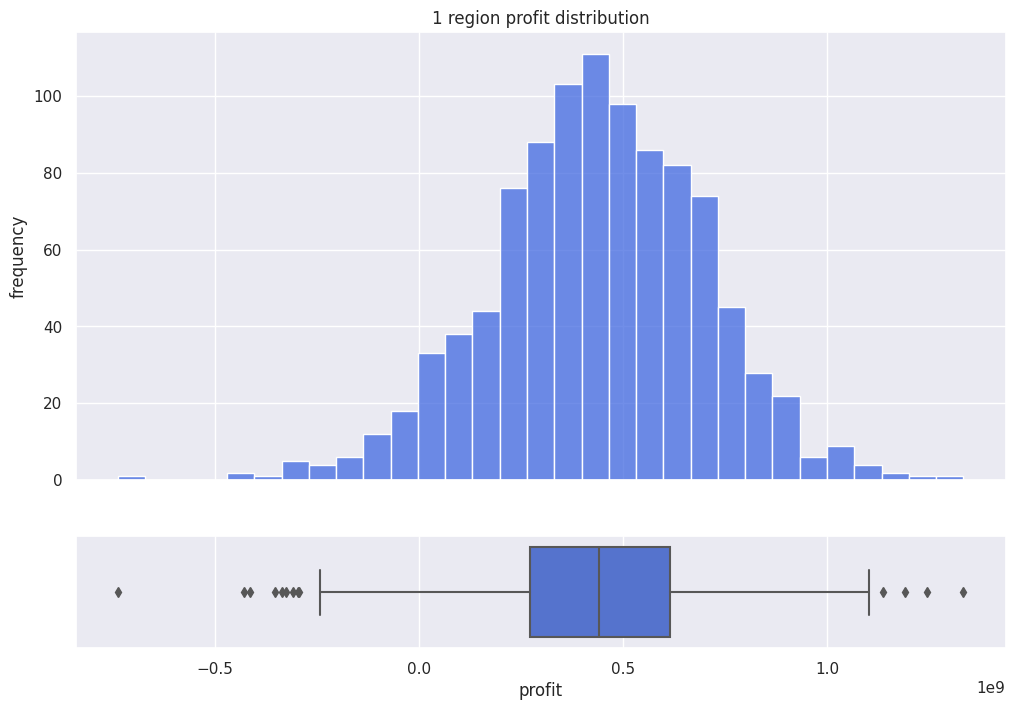

In [48]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=values[0], ax=ax_hist, color='royalblue')
sns.boxplot(x=values[0], ax=ax_box, color='royalblue')

ax_box.set(xlabel='profit')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='1 region profit distribution')
plt.show()

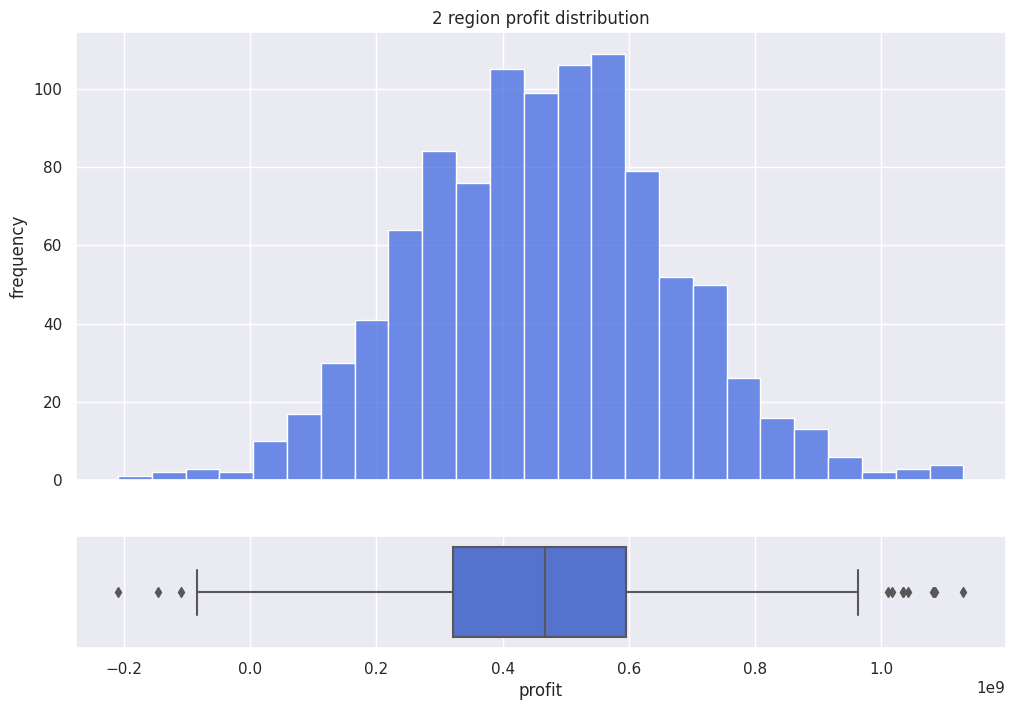

In [49]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=values[1], ax=ax_hist, color='royalblue')
sns.boxplot(x=values[1], ax=ax_box, color='royalblue')

ax_box.set(xlabel='profit')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='2 region profit distribution')
plt.show()

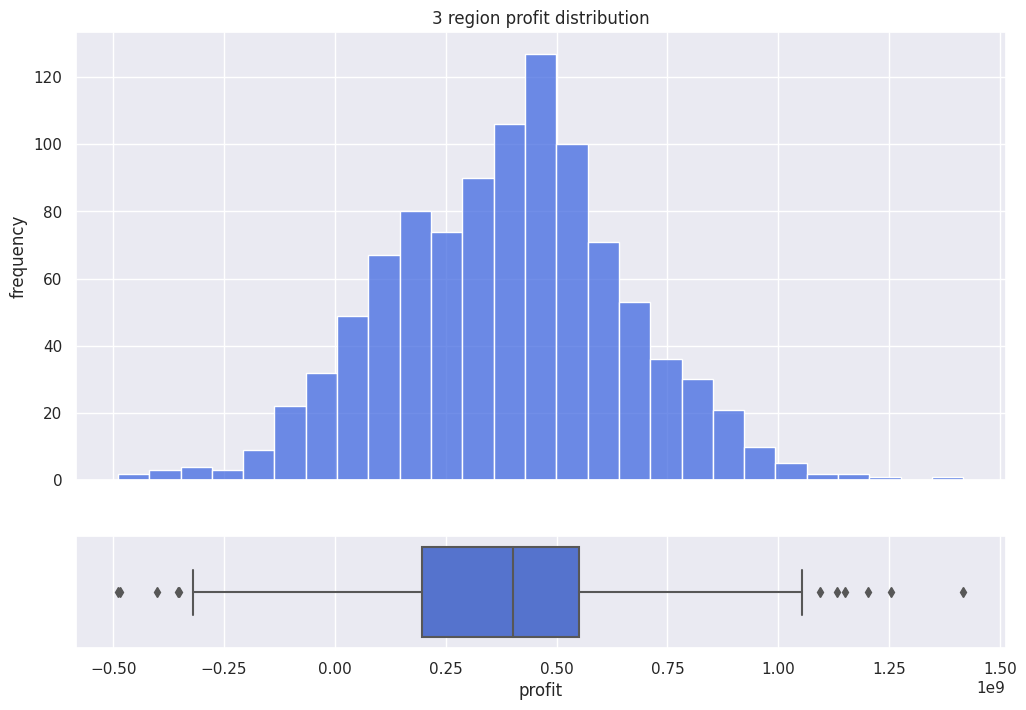

In [50]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=values[2], ax=ax_hist, color='royalblue')
sns.boxplot(x=values[2], ax=ax_box, color='royalblue')

ax_box.set(xlabel='profit')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='3 region profit distribution')
plt.show()

Средняя прибыль во втором регионе самая высокая, а в третьем - самая низкая. При чем риск убытков во втором регионе минимален и не содержит отрицательных значений в 95% доверительном интервале

В остальных регионах средняя прибыль меньше и повышен риск убытков

**ВЫВОД**

**В данном проекте были изучены показатели скважин и для каждого из трех регионов построена модель линейной регрессии для предсказания объема сырья в скважине. Был найден 95% доверительный интервал.С помощью техники Bootstrap построено распределение среднего объема сырья для каждого региона, было произведено сравнение получившихся результатов.**

**Самый лучший регион для разработки новых скважин - регион 2. Средняя прибыль для него составит 466,095,417 рублей.**

**Риск убытков в нем наименьший и составляет 0.8%**